<a href="https://colab.research.google.com/github/rohailkhan/Keras-Deeplearning-Francos/blob/master/05_16_Time_Invariant_Face_Detection_using_only_extracted_features_98_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# بسم الله الرحمن الرحيم
اللهم صل على محمد وعلى آل محمد كما صليت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد، اللهم بارك على محمد وعلى آل محمد كما باركت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد




In [2]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, 
because Keras may or maynot contain the features discussed here 
depending upon when you read this article, until the keras_
preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import os ,PIL
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import os ,PIL

In [0]:
final_df=pd.read_csv('/content/drive/My Drive/Aging model/final_df.csv')

In [4]:
final_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Facial Index', 'Mandibular Index',
       'Intercantal Index', 'Orbital Width Index', 'Eye Fissure Index',
       'Vermilion Height Index', 'Mouth Face Width Index', 'AGE', 'file_name'],
      dtype='object')

## Dropping column 0

In [5]:
final_df.drop(final_df.columns[[0]], axis = 1, inplace = True) 
final_df.head()

,Unnamed: 0.1,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE,file_name
0,0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2,001A02.JPG
1,0,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5,001A05.JPG
2,0,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8,001A08.JPG
3,0,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10,001A10.JPG
4,0,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14,001A14.JPG


## Dropping 0 and 10

In [6]:
final_df.drop(final_df.columns[[0,10]], axis = 1, inplace = True) 


,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


In [63]:
final_df.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


# Onee hot encoding of 82 samples

In [0]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)


In [0]:
enc_df = pd.DataFrame(enc.fit_transform(final_df[['ID']]).toarray())# merge with main df bridge_df on key values


In [70]:
final_df_full_hot = final_df.join(enc_df)
final_df_full_hot.head(2)

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
final_df_full_hot.to_csv('/content/drive/My Drive/Aging model/final_df_full_hot.csv')

# Start

In [0]:
final_df_full_hot=pd.read_csv('/content/drive/My Drive/Aging model/final_df_full_hot.csv')

In [8]:
final_df_full_hot.head(2)

,Unnamed: 0,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Remove col 0 and 9

In [9]:
final_df_full_hot.drop(final_df_full_hot.columns[[0,9]], axis = 1, inplace = True) 
final_df_full_hot.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Valid split

In [0]:
train_size = len(final_df_full_hot['ID'].unique()) * .8

In [0]:
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(final_df_full_hot['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, final_df_full_hot[final_df_full_hot['ID']==i]])
    else:
        valid = pd.concat([valid, final_df_full_hot[final_df_full_hot['ID']==i]])

In [12]:
print(valid.shape,train.shape)

(212, 90) (790, 90)


In [0]:
valid=valid.to_csv('/content/drive/My Drive/Aging model/valid.csv')

In [0]:
train=train.to_csv('/content/drive/My Drive/Aging model/train.csv')

In [13]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation (Test) Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation (Test) Set Has: 16 people


In [0]:
X_train = train[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]

X_valid = valid[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]


In [34]:
valid.columns

Index(['ID', 'Facial Index', 'Mandibular Index', 'Intercantal Index',
       'Orbital Width Index', 'Eye Fissure Index', 'Vermilion Height Index',
       'Mouth Face Width Index', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81'],
      dtype='object')

In [0]:
y_valid=valid[['0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81']]

In [0]:
y_train=train[['0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81']]

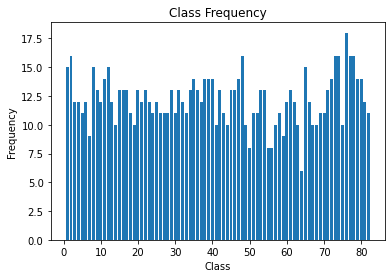

In [17]:
classes=final_df_full_hot['ID'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Test and Train new files

In [0]:
train=pd.read_csv('/content/drive/My Drive/Aging model/train.csv')

In [66]:
train.shape

(747, 91)

In [67]:
valid.shape

(212, 90)

In [0]:
test=pd.read_csv('/content/drive/My Drive/Aging model/test.csv')

In [0]:
X_train = train[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]

X_valid = valid[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]

X_test = test[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]


In [0]:
y_valid=valid[['0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81']]

In [0]:
y_train=train[['0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81']]

In [0]:
y_test=test[['0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81']]

In [70]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(747, 7) (212, 7) (747, 82) (212, 82)


In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(7,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(82, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [73]:
history = model.fit(X_train,
y_train,
epochs=20,
batch_size=100,
validation_data=(X_valid, y_valid))

Train on 747 samples, validate on 212 samples
Epoch 1/20
747/747 [==============================] - 0s 235us/step - loss: 0.5215 - accuracy: 0.8293 - val_loss: 0.2162 - val_accuracy: 0.9634
Epoch 2/20
747/747 [==============================] - 0s 75us/step - loss: 0.1354 - accuracy: 0.9767 - val_loss: 0.0860 - val_accuracy: 0.9878
Epoch 3/20
747/747 [==============================] - 0s 74us/step - loss: 0.0752 - accuracy: 0.9878 - val_loss: 0.0812 - val_accuracy: 0.9878
Epoch 4/20
747/747 [==============================] - 0s 69us/step - loss: 0.0679 - accuracy: 0.9878 - val_loss: 0.0851 - val_accuracy: 0.9878
Epoch 5/20
747/747 [==============================] - 0s 68us/step - loss: 0.0654 - accuracy: 0.9878 - val_loss: 0.0901 - val_accuracy: 0.9878
Epoch 6/20
747/747 [==============================] - 0s 70us/step - loss: 0.0644 - accuracy: 0.9878 - val_loss: 0.0942 - val_accuracy: 0.9878
Epoch 7/20
747/747 [==============================] - 0s 77us/step - loss: 0.0640 - accuracy: 0

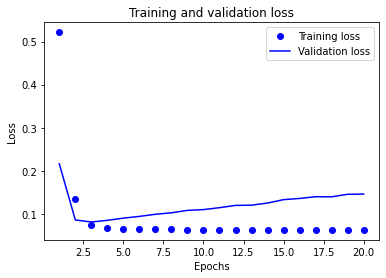

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

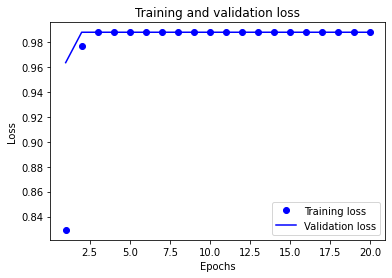

In [75]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
model.evaluate(X_test,y_test)

43/43 [==============================] - 0s 153us/step


[0.14050774102987246, 0.9878048300743103]

# Alhamdulillah got 98 percent accuracy